In [41]:
import os
train_dir = './input/dataset3/train'
validation_dir ='./input/dataset3/test'

train_1_dir = os.path.join(train_dir, '연갈탄')

train_2_dir = os.path.join(train_dir, '유연탄')

validation_1_dir = os.path.join(validation_dir, '연갈탄')

validation_2_dir = os.path.join(validation_dir, '유연탄')

In [42]:
train_1_fnames = os.listdir(train_1_dir)
print(train_1_fnames[:100])

train_2_fnames = os.listdir(train_2_dir)
train_2_fnames.sort()
print(train_2_fnames[:100])

['0.jpg', '1.jpg', '11.jpg', '12.jpg', '14.jpg', '15.jpg', '17.jpg', '18.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '26.jpg', '27.jpg', '3.jpg', '5.jpg', '6.jpg', '7.jpg', '9.jpg', '_0_1000.png', '_0_1017.png', '_0_1026.png', '_0_1034.png', '_0_1061.png', '_0_1065.png', '_0_1136.png', '_0_1159.png', '_0_118.png', '_0_1195.png', '_0_1199.png', '_0_1224.png', '_0_1245.png', '_0_1283.png', '_0_1285.png', '_0_1309.png', '_0_1329.png', '_0_1341.png', '_0_1351.png', '_0_1362.png', '_0_1413.png', '_0_1421.png', '_0_1449.png', '_0_145.png', '_0_1460.png', '_0_1473.png', '_0_1501.png', '_0_1510.png', '_0_1522.png', '_0_1528.png', '_0_1529.png', '_0_156.png', '_0_1594.png', '_0_1655.png', '_0_1670.png', '_0_1674.png', '_0_1701.png', '_0_1712.png', '_0_1721.png', '_0_1734.png', '_0_1781.png', '_0_1805.png', '_0_181.png', '_0_1824.png', '_0_1830.png', '_0_1859.png', '_0_1903.png', '_0_1960.png', '_0_2010.png', '_0_2042.png', '_0_205.png', '_0_2052.png', '_0_2071.png', '_0_2084.png', '

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

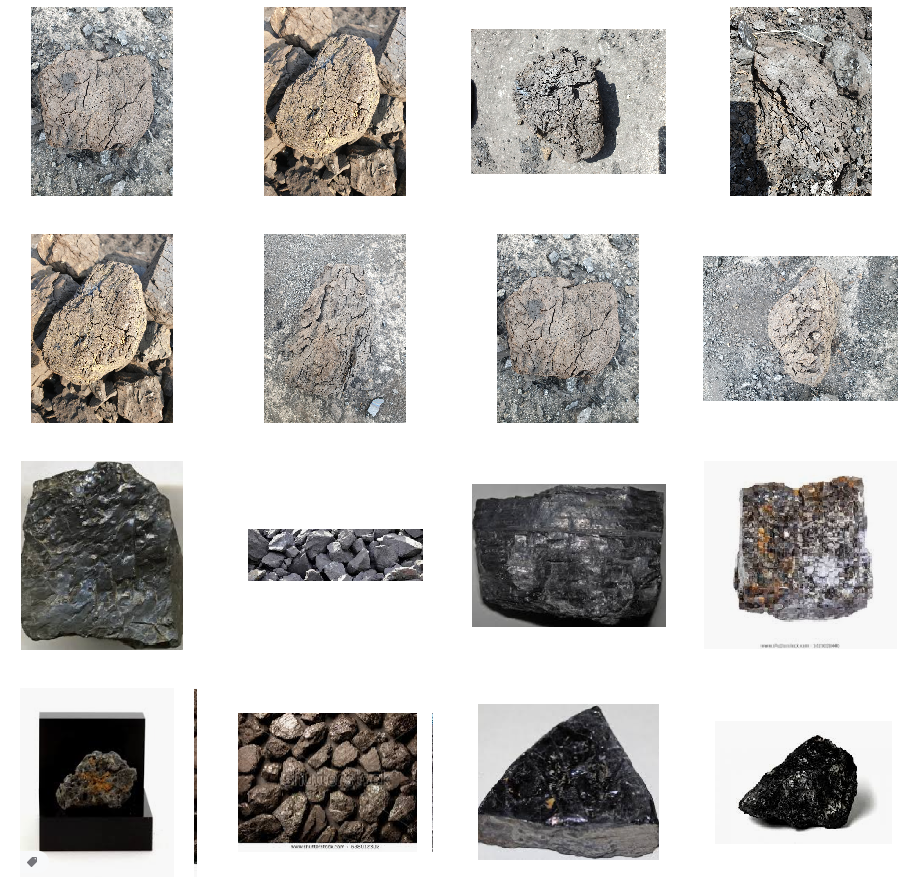

In [44]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_fnames[pic_index-8:pic_index]]
next_2_pix = [os.path.join(train_2_dir, fname) 
                for fname in train_2_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_1_pix+next_2_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [31]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models

In [27]:
base_model = keras.applications.ResNet152(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

234700800/234698864 [==============================] - 30s 0us/step


In [32]:
base_model.trainable = False
base_model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [34]:
additional_model = models.Sequential()
additional_model.add(base_model)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(4096, activation='relu'))
additional_model.add(layers.Dense(2048, activation='relu'))
additional_model.add(layers.Dense(1024, activation='relu'))
additional_model.add(layers.Dense(1, activation='sigmoid'))
 
additional_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Model)            (None, 5, 5, 2048)        58370944  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              209719296 
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1025      
Total params: 278,580,097
Trainable params: 220,209,153
Non-trainable params: 58,370,944
_______________________________

In [37]:
additional_model.compile(loss="binary_crossentropy", optimizer="nadam",metrics=['acc'])

<h1>데이터 부풀리기

In [126]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')
# next_1_pix = [os.path.join(train_1_dir, fname) 
#                 for fname in train_1_fnames]
# for j in next_1_pix:
#     img = load_img(j)
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
    
#     i = 0
#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir='./input/dataset1/변형연갈탄'):
#         i += 1
#         if i > 20:
#             break  


In [127]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')
# next_2_pix = [os.path.join(train_2_dir, fname) 
#                 for fname in train_2_fnames]
# for j in next_2_pix:
#     img = load_img(j)
#     x = img_to_array(img)
#     x = x.reshape((1,) + x.shape)
    
#     i = 0
#     for batch in datagen.flow(x, batch_size=1,
#                               save_to_dir='./input/dataset1/변형유연탄'):
#         i += 1
#         if i > 20:
#             break  


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=32,
        
        class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2791 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [46]:
history=additional_model.fit(train_generator,
epochs = 30,
validation_data = validation_generator
)

Epoch 1/30
88/88 [==============================] - 335s 4s/step - loss: 1.4045 - acc: 0.7571 - val_loss: 0.8275 - val_acc: 0.7000
Epoch 2/30
88/88 [==============================] - 334s 4s/step - loss: 0.3027 - acc: 0.8549 - val_loss: 0.5922 - val_acc: 0.7500
Epoch 3/30
88/88 [==============================] - 343s 4s/step - loss: 0.4192 - acc: 0.8484 - val_loss: 0.9746 - val_acc: 0.3000
Epoch 4/30
88/88 [==============================] - 344s 4s/step - loss: 0.3245 - acc: 0.8441 - val_loss: 0.4340 - val_acc: 0.7000
Epoch 5/30
88/88 [==============================] - 337s 4s/step - loss: 0.2164 - acc: 0.9119 - val_loss: 0.3611 - val_acc: 0.8000
Epoch 6/30
88/88 [==============================] - 339s 4s/step - loss: 0.1886 - acc: 0.9251 - val_loss: 0.3291 - val_acc: 0.8000
Epoch 7/30
88/88 [==============================] - 354s 4s/step - loss: 0.2016 - acc: 0.9165 - val_loss: 0.2987 - val_acc: 0.8500
Epoch 8/30
88/88 [==============================] - 350s 4s/step - loss: 0.2463 - a

<Figure size 432x288 with 0 Axes>

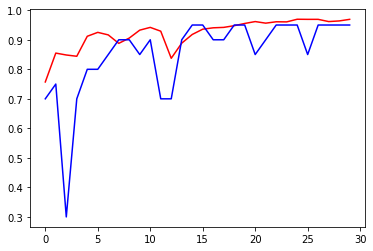

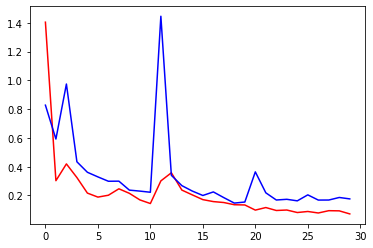

<Figure size 432x288 with 0 Axes>

In [47]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.figure()


plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.figure()



In [54]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


def load_image(filename):
	img = load_img(filename, target_size=(150,150))
	img = img_to_array(img)
	img = img.reshape(1,150,150, 3)
	img = img.astype('float32')
	return img

test_dir ='./input/dataset3/valid'
test_1_dir = os.path.join(test_dir, '연갈탄')
test_2_dir = os.path.join(test_dir, '유연탄')

test_1_fnames = os.listdir(test_1_dir)
test_2_fnames = os.listdir(test_2_dir)

test_1_pix = [os.path.join(test_1_dir, fname) 
                for fname in test_1_fnames]
test_2_pix = [os.path.join(test_2_dir, fname) 
                for fname in test_2_fnames]
p1=0

for j in test_1_pix:
    img = load_image(j)
    result = additional_model.predict(img)
    if(result[0]==0):
        p1=p1+1
p2=0
for j in test_2_pix:
    img = load_image(j)
    result = additional_model.predict(img)
    if(result[0]==1):
        p2=p2+1

In [55]:
print(p1)

0


In [56]:
print(p2)

7
